In [1]:
# Run this cell first
!pip install seaborn -q   # safe even if seaborn already exists
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
from google.colab import files
import io

uploaded = files.upload()  # Click Choose Files and select titanic_synthetic.csv
# load the first uploaded file into a dataframe
fname = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[fname]))
df.head()

Saving titanic_synthetic.csv to titanic_synthetic.csv


,survived,sex,class,age,embarked
0,0,male,Third,19,C
1,1,female,Third,42,C
2,1,male,Third,12,S
3,1,male,Third,22,Q
4,0,male,Third,24,C


In [3]:
print("Shape:", df.shape)
print("\nColumns & dtypes:")
print(df.dtypes)
print("\nMissing values per column:\n", df.isnull().sum())

Shape: (891, 5)

Columns & dtypes:
survived     int64
sex         object
class       object
age          int64
embarked    object
dtype: object

Missing values per column:
 survived    0
sex         0
class       0
age         0
embarked    0
dtype: int64


In [4]:
# Fill age with median if needed
if 'age' in df.columns:
    if df['age'].isnull().sum() > 0:
        df['age'] = df['age'].fillna(df['age'].median())

# Drop rows with missing embarked (if present)
if 'embarked' in df.columns:
    df = df.dropna(subset=['embarked'])

# Show result
print("After cleaning, shape:", df.shape)
print(df.isnull().sum())

After cleaning, shape: (891, 5)
survived    0
sex         0
class       0
age         0
embarked    0
dtype: int64


In [5]:
# Overall survival rate
if 'survived' in df.columns:
    overall = df['survived'].mean()
    print(f"Overall survival rate: {overall:.2%}\n")

    # By sex
    print("Survival by sex:")
    print(df.groupby('sex')['survived'].mean())

    print("\nSurvival by class:")
    print(df.groupby('class')['survived'].mean())
else:
    print("Column 'survived' not found in dataset.")

Overall survival rate: 48.04%

Survival by sex:
sex
female    0.748387
male      0.337349
Name: survived, dtype: float64

Survival by class:
class
First     0.542056
Second    0.471591
Third     0.457086
Name: survived, dtype: float64


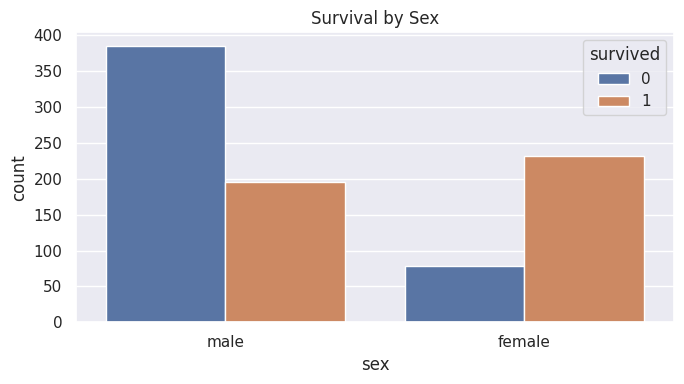

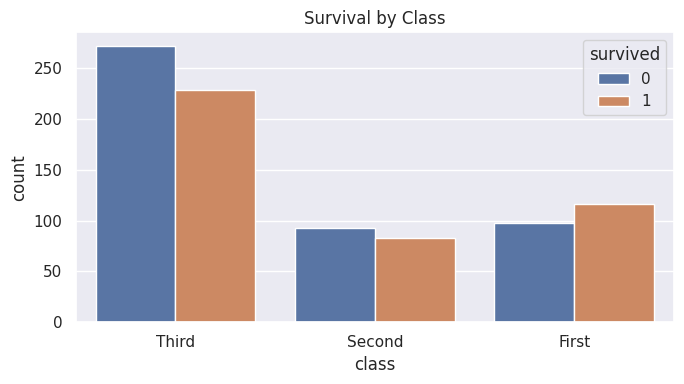

In [6]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='sex', hue='survived')
plt.title('Survival by Sex')
plt.tight_layout()
plt.savefig('titanic_survival_by_sex.png', bbox_inches='tight')
plt.show()

plt.figure(figsize=(7,4))
sns.countplot(data=df, x='class', hue='survived')
plt.title('Survival by Class')
plt.tight_layout()
plt.savefig('titanic_survival_by_class.png', bbox_inches='tight')
plt.show()


In [7]:
# Save cleaned CSV
df.to_csv('titanic_cleaned.csv', index=False)
print("Saved titanic_cleaned.csv in current folder.")

# Download files to your computer (click the download link that appears)
from google.colab import files
files.download('titanic_cleaned.csv')
files.download('titanic_survival_by_sex.png')
files.download('titanic_survival_by_class.png')


Saved titanic_cleaned.csv in current folder.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>